In [1]:
import cv2

import re

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import re

import pymorphy2

import varname

import advertools as adv

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns #for visualization

import datetime

import ast 

import dostoevsky

import os

from sklearn.ensemble import GradientBoostingRegressor

from stop_words import get_stop_words

import string

pd.set_option('display.max_rows', 300)

# pd.set_option('display.max_columns', None)

# pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', 300)

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn import linear_model #линейные модели

from sklearn import metrics #метрики

from sklearn import preprocessing #предобработка

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from numpy import mean

from numpy import absolute

from numpy import sqrt

import pandas as pd

from sklearn.manifold import TSNE

import swifter

# Визуализация

import plotly.express as px # для визуализации данных

import matplotlib.pyplot as plt # для отображения рукописных цифр

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import RobustScaler

import math

from swifter import set_defaults

set_defaults(

    npartitions=None,

    dask_threshold=1,

    scheduler="processes",

    progress_bar=True,

    progress_bar_desc=False,

    allow_dask_on_strings=False,

    force_parallel=False,

)

import joblib

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, rand_score, adjusted_rand_score

from sklearn.metrics import normalized_mutual_info_score, homogeneity_score, completeness_score, f1_score, accuracy_score

from sklearn.cluster import DBSCAN

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import kmeans_plusplus

# import numba

from sklearn.decomposition import PCA

from sklearn.decomposition import TruncatedSVD

from sklearn.manifold import TSNE

from scipy.special import expit, logit

import tqdm

from plotly.subplots import make_subplots

from sklearn.pipeline import Pipeline

from sklearn.mixture import GaussianMixture

from plotly.graph_objects import Scatterpolar

from plotly import graph_objects as go

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier

from mpl_toolkits.mplot3d import Axes3D

import optuna

from statsmodels.tsa.api import SimpleExpSmoothing

from statsmodels.tsa.stattools import adfuller

import tqdm 

from tqdm import tqdm

C:\Users\Arwielao\AppData\Roaming\Python\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Arwielao\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Arwielao\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
grand_df_complex = pd.read_csv('grand_data_zero_3.csv')

grand_df = grand_df_complex.copy()

grand_df.rename(columns={"s_max.1": "v_max"}, inplace=True)

In [3]:
target = 'forwards_to_views'

In [4]:
pipeline_tsne = Pipeline([
            
            ('scaler', StandardScaler()), 
            
            ('tsne', TSNE(perplexity=50, random_state=100, n_components=2))
            
            ])

In [5]:
tsne_features = pipeline_tsne.fit_transform(grand_df.drop([target,'dtdays'], axis=1))

In [6]:
tsne_features

array([[-12.273916 ,  24.952686 ],
       [  4.7233653,  48.739216 ],
       [ 25.329515 ,  48.41169  ],
       ...,
       [ 43.41459  , -10.142822 ],
       [ 40.10826  ,  32.090214 ],
       [-15.100179 ,  -9.581066 ]], dtype=float32)

<AxesSubplot:>

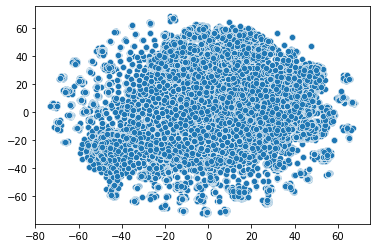

In [7]:
sns.scatterplot(tsne_features[:,0],tsne_features[:,1])

# Сложно выделить кластеры на глаз

# KMEANS кластеризация 

In [8]:
silhouettes = []

clusters_ar = []

for clusters in tqdm(range(2,12)):
    
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    
    kmeans.fit_predict(tsne_features)
    
    silhouettes.append(silhouette_score(tsne_features, kmeans.labels_))
    
    clusters_ar.append(clusters)

100%|██████████| 10/10 [04:12<00:00, 25.27s/it]


In [9]:
kmeans.labels_

array([4, 8, 8, ..., 1, 6, 0])

<AxesSubplot:>

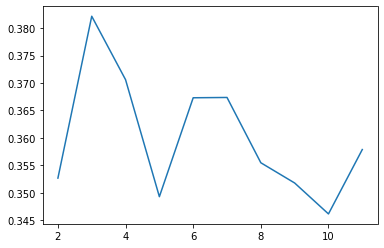

In [10]:
sns.lineplot(x=clusters_ar, y=silhouettes)

In [11]:
kmeans = KMeans(n_clusters=3)
    
kmeans_labels = kmeans.fit_predict(tsne_features)

In [12]:
df_clustrs_kmeans = pd.DataFrame({'tsne1':tsne_features[:,0], 'tsne2': tsne_features[:,1], 'labels':kmeans_labels})

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

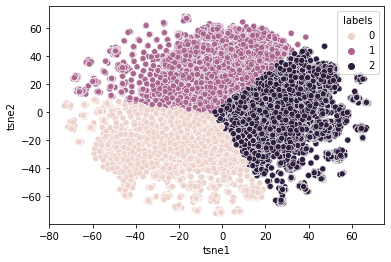

In [13]:
sns.scatterplot(data=df_clustrs_kmeans, x='tsne1', y='tsne2', hue='labels')

In [20]:
len(np.unique(np.array([1,2,3,4,55,5,4,3])))

6

In [24]:
silhouettes = []

clusters_ar = []

for eps in tqdm(np.arange(0.1,3,0.2)):
    
    for min_samples in (range(1,21,4)):
        
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(tsne_features)
        
        silhouettes.append(silhouette_score(tsne_features, clustering))
    
        clusters_ar.append(len(np.unique(clustering)))
        
        break

100%|██████████| 15/15 [06:45<00:00, 27.01s/it]


<AxesSubplot:>

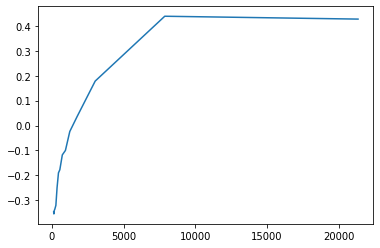

In [27]:
sns.lineplot(x=clusters_ar, y=silhouettes)

# GaussianMixture

In [34]:
gm = GaussianMixture(n_components=3, random_state=42).fit_predict(tsne_features)

In [35]:
gm

array([2, 2, 2, ..., 1, 1, 0], dtype=int64)

In [36]:
silhouettes = []

clusters_ar = []

for clusters in tqdm(range(2,12)):
    
    gm = GaussianMixture(n_components=clusters, random_state=42).fit_predict(tsne_features)
    
    silhouettes.append(silhouette_score(tsne_features, gm))
    
    clusters_ar.append(clusters)

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:>

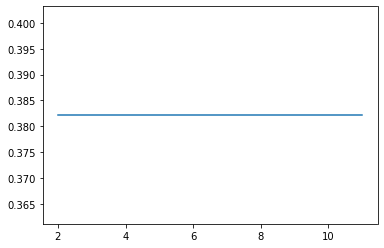

In [31]:
sns.lineplot(x=clusters_ar, y=silhouettes)